In [1]:
# Importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from keras.models import Model
from keras.layers import Input, Dense

Using TensorFlow backend.
C:\Users\gillg\anaconda3\envs\UL\lib\site-packages\tensorflow\python\framework\dtypes.py:526: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\gillg\anaconda3\envs\UL\lib\site-packages\tensorflow\python\framework\dtypes.py:527: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\gillg\anaconda3\envs\UL\lib\site-packages\tensorflow\python\framework\dtypes.py:528: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\gillg\anaconda3\envs\UL\lib\site-packages\tenso

## *Data*

In [10]:
# 1a.load the dataset
x_train = pd.read_csv('csvTrainImages 60k x 784.csv', header=None)
y_train = pd.read_csv('csvTrainLabel 60k x 1.csv', header=None)
x_test = pd.read_csv('csvTestImages 10k x 784.csv', header=None)
y_test = pd.read_csv('csvTestLabel 10k x 1.csv', header=None)

# convert to numpy arrays
x_train = x_train.values
y_train = y_train.values
x_test = x_test.values
y_test = y_test.values

# print the shape of the data
print(f'x_train shape: {x_train.shape}')
print(f'y_train shape: {y_train.shape}')
print(f'x_test shape: {x_test.shape}')
print(f'y_test shape: {y_test.shape}')

x_train shape: (60000, 784)
y_train shape: (60000, 1)
x_test shape: (10000, 784)
y_test shape: (10000, 1)


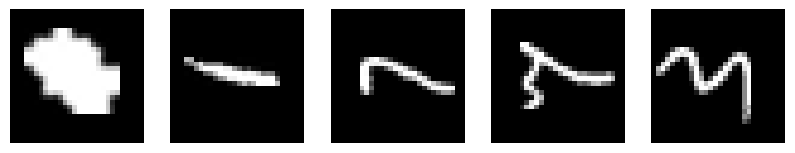

In [12]:
# 1b. normalize by dividing each value by 255
x_train = x_train / 255.0
x_test = x_test / 255.0

# reshape each image to 28x28 for display
x_train_reshaped = x_train.reshape(-1, 28, 28)
x_test_reshaped = x_test.reshape(-1, 28, 28)

# plot the first five images
plt.figure(figsize=(10, 7))
for i in range(5):
    plt.subplot(1, 5, i + 1)
    plt.imshow(x_train_reshaped[i], cmap='gray')
    plt.axis('off')
plt.show()

# flatten the images to 784 for input to the neural network
x_train_flattened = x_train.reshape(-1, 784)
x_test_flattened = x_test.reshape(-1, 784)

## *Modelling*

In [14]:
# 2a.input layer
input_layer = Input(shape=(784,))

In [15]:
# 2b. encoding stage
encoded = Dense(256, activation='relu')(input_layer)
encoded = Dense(128, activation='relu')(encoded)
encoded = Dense(64, activation='relu')(encoded)
encoded = Dense(16, activation='relu')(encoded)

Instructions for updating:
Colocations handled automatically by placer.


In [16]:
# 2c. dencoding stage
decoded = Dense(64, activation='relu')(encoded)
decoded = Dense(128, activation='relu')(decoded)
decoded = Dense(784, activation='sigmoid')(decoded)

In [18]:
# 2d. autoencoder
autoencoder = Model(input_layer, decoded)
autoencoder.compile(loss='binary_crossentropy',
              optimizer='adam')
autoencoder.fit(x_train_flattened, x_train_flattened, epochs=50)

Instructions for updating:
Use tf.cast instead.
Epoch 1/50
60000/60000 [==============================] - 33s 543us/step - loss: 0.1385
Epoch 2/50
60000/60000 [==============================] - 31s 521us/step - loss: 0.0983
Epoch 3/50
60000/60000 [==============================] - 31s 517us/step - loss: 0.0913
Epoch 4/50
60000/60000 [==============================] - 32s 527us/step - loss: 0.0881
Epoch 5/50
60000/60000 [==============================] - 31s 523us/step - loss: 0.0862
Epoch 6/50
60000/60000 [==============================] - 30s 507us/step - loss: 0.0849
Epoch 7/50
60000/60000 [==============================] - 31s 519us/step - loss: 0.0840
Epoch 8/50
60000/60000 [==============================] - 31s 514us/step - loss: 0.0832
Epoch 9/50
60000/60000 [==============================] - 31s 519us/step - loss: 0.0825
Epoch 10/50
60000/60000 [==============================] - 31s 519us/step - loss: 0.0819
Epoch 11/50
60000/60000 [==============================] - 31s 520us/st

## *Conclusion*

In [26]:
# 3a. show the images
encoder_output = Model(input_layer, encoded).predict(x_test_flattened[:5])
encoder_output = encoder_output.reshape((-1, 4, 4)) * 255
decoder_output = autoencoder.predict(x_test_flattened[:5])
decoder_output = decoder_output.reshape((-1, 28,28)) * 255
x_test_images_reshaped = x_test_flattened.reshape(-1, 28, 28)

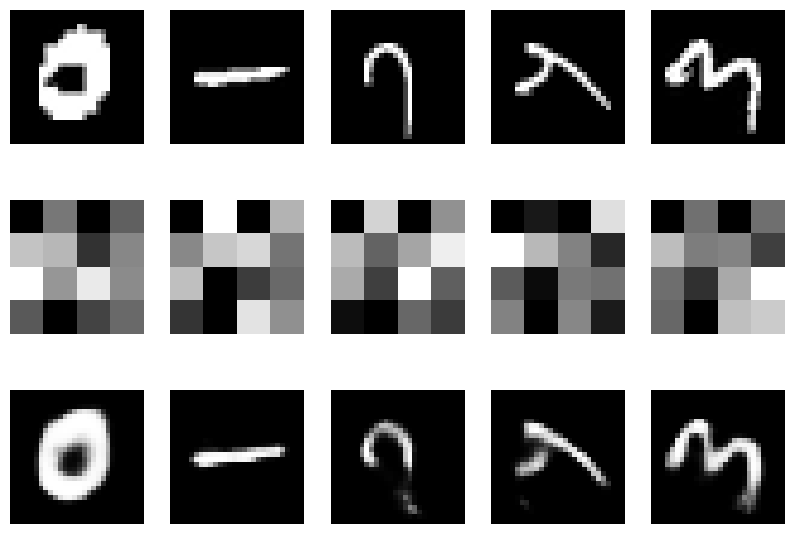

In [27]:
plt.figure(figsize=(10, 7))
for i in range(5):
    # Plot the original image
    plt.subplot(3, 5, i + 1)
    plt.imshow(x_test_images_reshaped[i], cmap='gray')
    plt.axis('off')
    
    # Plot the encoder output
    plt.subplot(3, 5, i + 6)
    plt.imshow(encoder_output[i], cmap='gray')
    plt.axis('off')   
    
    # Plot the decoder output
    plt.subplot(3, 5, i + 11)
    plt.imshow(decoder_output[i], cmap='gray')
    plt.axis('off')   

# 3a. Adjustments:
1. Adding an additional layer in encoder to let the model analyze the training data closely.
2. Increase the number of epochs from 20 to 50, helping model undertand the data better.
3. Tried changing the learning rate, which help decrease the loss, but it was still significant.
4. Decrease the latent space to 16 units, while using relu as an activation function and adam as optimizer, and got loss near 0.0761.


# 3b. Autoencoder performance:
- The autoencoder performs really well in reconstructing the images, as the decoded images are really same as the originial images. The image quality is also good, and the letters are really visisble. 

# 3c. Memory saved
## Memory Savings Calculation:
Each image is represented as a flattened array of 784 pixel values so:
- **Original Image Size**: 784 values × 4 bytes = 3136 bytes per image.
- **Encoded Image Size** (with 16 units in latent space): 16 values × 4 bytes = 64 bytes per image.

- **Memory saved**:  97.96% 